In [3]:
import pandas as pd
# Загрузка датасетов
df1 = pd.read_csv('C:\\Users\\PC\\DPOIvK\\homeworks\\HW07\\data\\S07-hw-dataset-01.csv')
df2 = pd.read_csv('C:\\Users\\PC\\DPOIvK\\homeworks\\HW07\\data\\S07-hw-dataset-02.csv')
df3 = pd.read_csv('C:\\Users\\PC\\DPOIvK\\homeworks\\HW07\\data\\S07-hw-dataset-03.csv')
# Проверка данных
def analyze_dataset(df, dataset_name):
    print(f"Анализ для {dataset_name}:")
    print("Первые 5 строк данных:")
    print(df.head())  # вывод первых 5 строк
    print("\nИнформация о датасете:")
    print(df.info())  # информация о данных
    print("\nБазовые статистики (describe):")
    print(df.describe())  # статистика по данным
    print("\nПропуски в данных:")
    print(df.isnull().sum())  # количество пропусков
    print("\nДоля пропусков:")
    print(df.isnull().mean())  # доля пропусков
    print("\nТипы данных в столбцах:")
    print(df.dtypes)  # типы данных
    print("=" * 35)
    # Определяем признаки X и сохраняем sample_id
    sample_id = df['sample_id']  # сохраняем sample_id
    X = df.drop(columns=['sample_id'])  
    return X, sample_id
# Анализ и определение X
X1, sample_id1 = analyze_dataset(df1, "Датасет 01")
X2, sample_id2 = analyze_dataset(df2, "Датасет 02")
X3, sample_id3 = analyze_dataset(df3, "Датасет 03")

Анализ для Датасет 01:
Первые 5 строк данных:
   sample_id        f01        f02       f03         f04        f05  \
0          0  -0.536647 -69.812900 -0.002657   71.743147 -11.396498   
1          1  15.230731  52.727216 -1.273634 -104.123302  11.589643   
2          2  18.542693  77.317150 -1.321686 -111.946636  10.254346   
3          3 -12.538905 -41.709458  0.146474   16.322124   1.391137   
4          4  -6.903056  61.833444 -0.022466  -42.631335   3.107154   

         f06        f07       f08  
0 -12.291287  -6.836847 -0.504094  
1  34.316967 -49.468873  0.390356  
2  25.892951  44.595250  0.325893  
3   2.014316 -39.930582  0.139297  
4  -5.471054   7.001149  0.131213  

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        120

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Препроцессинг
scaler = StandardScaler()  # Масштабирование
imputer = SimpleImputer(strategy='mean')  # Обработка пропусков (возьмем среднее)
# Выделениие числовых признаков для каждого датасета
numerical_columns_1 = X1.select_dtypes(include=['float64']).columns
numerical_columns_2 = X2.select_dtypes(include=['float64']).columns
# Препроцессинг для всех датасетов
# Определение числовых и категориальных признаков для каждого датасета
numerical_columns_1 = df1.select_dtypes(include=['float64']).columns
numerical_columns_2 = df2.select_dtypes(include=['float64']).columns
numerical_columns_3 = df3.select_dtypes(include=['float64']).columns
categorical_columns_1 = df1.select_dtypes(include=['object']).columns
categorical_columns_2 = df2.select_dtypes(include=['object']).columns
categorical_columns_3 = df3.select_dtypes(include=['object']).columns
# Масштабирование числовых признаков и обработка пропусков
scaler = StandardScaler()  # Масштабирование
imputer = SimpleImputer(strategy='mean')  # Обработка пропусков (замена на среднее)
# Препроцессинг для числовых и категориальных признаков
# Используем ColumnTransformer для обработки категориальных признаков и числовых признаков
# Для первого датасета
preprocessor_1 = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', imputer), ('scaler', scaler)]), numerical_columns_1),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns_1)
    ])
# Для второго датасета
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', imputer), ('scaler', scaler)]), numerical_columns_2),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns_2)
    ])
# Для третьего датасета
preprocessor_3 = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', imputer), ('scaler', scaler)]), numerical_columns_3),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns_3)
    ])
# Применение препроцессинга
df1_processed = preprocessor_1.fit_transform(df1.drop(columns=['sample_id']))
df2_processed = preprocessor_2.fit_transform(df2.drop(columns=['sample_id']))
df3_processed = preprocessor_3.fit_transform(df3.drop(columns=['sample_id']))
# Проверка: вывод первых 5 строк после обработки
print(df1_processed[:5], df2_processed[:5], df3_processed[:5])

[[ 0.17142668 -1.46280499  0.43827875  1.35028177 -1.5948697  -0.89591542
  -0.11539556 -0.84301268]
 [ 1.60302144  0.55306178 -2.1005838  -1.61705848  1.67664705  2.2545476
  -0.83142723  0.6304788 ]
 [ 1.90373017  0.95758263 -2.19656934 -1.74905918  1.48660018  1.68513022
   0.74843886  0.52428406]
 [-0.91831503 -1.00048459  0.73617818  0.41517997  0.22513839  0.07106513
  -0.67122564  0.21689135]
 [-0.40660969  0.70286533  0.39870815 -0.57952352  0.46937156 -0.43490498
   0.11702228  0.20357459]] [[-0.39789177 -3.14730563  2.61542782]
 [-1.57409478  2.39537899  0.7363646 ]
 [-1.64703263 -0.60266152 -2.35251356]
 [-2.19005641 -2.72479336 -1.4498717 ]
 [ 1.23658383 -3.58047513  0.22044856]] [[-0.86161489  0.84136075 -0.80294603  0.29748161]
 [ 1.62968311 -2.08489576  2.44468683 -0.43022975]
 [-0.50648098 -0.7626304   0.4992609  -1.42788996]
 [ 1.22112761  0.1117507   1.01168106 -0.48034263]
 [ 1.89830286 -2.10241032  1.79991419  0.37623961]]


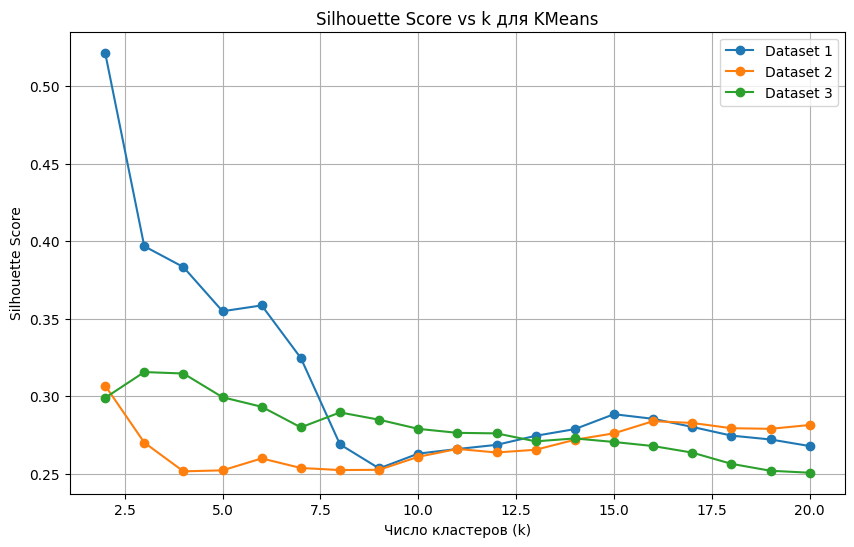

NameError: name 'evaluate_dbscan' is not defined

In [24]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
# Подбор числа кластеров для KMeans
k_range = range(2, 21)
sil_scores_1 = []
sil_scores_2 = []
sil_scores_3 = []
for k in k_range:
    kmeans_1 = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_1.fit(df1_processed)
    sil_scores_1.append(silhouette_score(df1_processed, kmeans_1.labels_))

    kmeans_2 = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_2.fit(df2_processed)
    sil_scores_2.append(silhouette_score(df2_processed, kmeans_2.labels_))

    kmeans_3 = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_3.fit(df3_processed)
    sil_scores_3.append(silhouette_score(df3_processed, kmeans_3.labels_))
# График "Метрика vs k" для KMeans
plt.figure(figsize=(10, 6))
plt.plot(k_range, sil_scores_1, label='Dataset 1', marker='o')
plt.plot(k_range, sil_scores_2, label='Dataset 2', marker='o')
plt.plot(k_range, sil_scores_3, label='Dataset 3', marker='o')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k для KMeans')
plt.legend()
plt.grid(True)
plt.show()
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
# Параметры для DBSCAN
eps_values = [0.5, 0.7, 1.0, 1.5]
min_samples_values = [3, 5, 10]
# Результаты для DBSCAN для Датасета 1
dbscan_results_1 = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_1 = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_1.fit(df1_processed)
        non_noise_mask_1 = dbscan_1.labels_ != -1
        if np.any(non_noise_mask_1) and len(np.unique(dbscan_1.labels_[non_noise_mask_1])) > 1:
            sil_score_1 = silhouette_score(df1_processed[non_noise_mask_1], dbscan_1.labels_[non_noise_mask_1])
            dbscan_results_1.append((eps, min_samples, sil_score_1))
# Результаты для DBSCAN для Датасета 2
dbscan_results_2 = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_2 = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_2.fit(df2_processed)
        non_noise_mask_2 = dbscan_2.labels_ != -1
        if np.any(non_noise_mask_2) and len(np.unique(dbscan_2.labels_[non_noise_mask_2])) > 1:
            sil_score_2 = silhouette_score(df2_processed[non_noise_mask_2], dbscan_2.labels_[non_noise_mask_2])
            dbscan_results_2.append((eps, min_samples, sil_score_2))
# Результаты для DBSCAN для Датасета 3
dbscan_results_3 = []
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_3 = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_3.fit(df3_processed)
        non_noise_mask_3 = dbscan_3.labels_ != -1
        if np.any(non_noise_mask_3) and len(np.unique(dbscan_3.labels_[non_noise_mask_3])) > 1:
            sil_score_3 = silhouette_score(df3_processed[non_noise_mask_3], dbscan_3.labels_[non_noise_mask_3])
            dbscan_results_3.append((eps, min_samples, sil_score_3))
# Результаты для каждого датасета
dbscan_results_1 = []
dbscan_results_2 = []
dbscan_results_3 = []
# Обрабатываем каждый датасет с помощью функции evaluate_dbscan
dbscan_results_1 = evaluate_dbscan(df1_processed, eps_values, min_samples_values)
dbscan_results_2 = evaluate_dbscan(df2_processed, eps_values, min_samples_values)
dbscan_results_3 = evaluate_dbscan(df3_processed, eps_values, min_samples_values)
# Выводим результаты
print("Результаты DBSCAN для Датасета 1:", dbscan_results_1)
print("Результаты DBSCAN для Датасета 2:", dbscan_results_2)
print("Результаты DBSCAN для Датасета 3:", dbscan_results_3)
# AgglomerativeClustering с подбором k и linkage
linkage_values = ['ward', 'complete', 'average']
agg_results_1 = []
agg_results_2 = []
agg_results_3 = []
for linkage in linkage_values:
    ac_1 = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    ac_1.fit(df1_processed)
    agg_results_1.append((linkage, silhouette_score(df1_processed, ac_1.labels_)))
    ac_2 = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    ac_2.fit(df2_processed)
    agg_results_2.append((linkage, silhouette_score(df2_processed, ac_2.labels_)))
    ac_3 = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    ac_3.fit(df3_processed)
    agg_results_3.append((linkage, silhouette_score(df3_processed, ac_3.labels_)))
# Вывод результатов AgglomerativeClustering
print("Результаты AgglomerativeClustering для Датасета 1:", agg_results_1)
print("Результаты AgglomerativeClustering для Датасета 2:", agg_results_2)
print("Результаты AgglomerativeClustering для Датасета 3:", agg_results_3)

In [21]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
# Функция для расчёта метрик качества (с учётом шума для DBSCAN)
def calculate_metrics(X, labels):
    # Если есть шум (метка -1 для DBSCAN)
    if np.any(labels == -1):
        # Вывод доли шума
        noise_points = labels == -1
        print(f"Доля шума: {noise_points.mean():.2f}")  
        # Вычисление метрики только для non-noise точек
        non_noise_mask = labels != -1
        X_non_noise = X[non_noise_mask]
        labels_non_noise = labels[non_noise_mask]
        # Проверка, что после исключения шума остаётся хотя бы 2 кластера
        if len(np.unique(labels_non_noise)) > 1:
            silhouette = silhouette_score(X_non_noise, labels_non_noise)
            davies_bouldin = davies_bouldin_score(X_non_noise, labels_non_noise)
            calinski_harabasz = calinski_harabasz_score(X_non_noise, labels_non_noise)
        else:
            silhouette = davies_bouldin = calinski_harabasz = np.nan  # Если кластеров меньше 2, устанавливаем NaN
    else:
        # Для алгоритмов без шума
        silhouette = silhouette_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)
    return silhouette, davies_bouldin, calinski_harabasz
# Рассчет метрики для каждого датасета и каждого алгоритма
# Для KMeans
silhouette_1, db_score_1, ch_score_1 = calculate_metrics(df1_processed, kmeans_1.labels_)
silhouette_2, db_score_2, ch_score_2 = calculate_metrics(df2_processed, kmeans_2.labels_)
silhouette_3, db_score_3, ch_score_3 = calculate_metrics(df3_processed, kmeans_3.labels_)
# Для DBSCAN
silhouette_dbscan_1, db_score_dbscan_1, ch_score_dbscan_1 = calculate_metrics(df1_processed, dbscan_1.labels_)
silhouette_dbscan_2, db_score_dbscan_2, ch_score_dbscan_2 = calculate_metrics(df2_processed, dbscan_2.labels_)
silhouette_dbscan_3, db_score_dbscan_3, ch_score_dbscan_3 = calculate_metrics(df3_processed, dbscan_3.labels_)
# Выводим результаты для KMeans
print("Метрики для KMeans для Датасета 1:", silhouette_1, db_score_1, ch_score_1)
print("Метрики для KMeans для Датасета 2:", silhouette_2, db_score_2, ch_score_2)
print("Метрики для KMeans для Датасета 3:", silhouette_3, db_score_3, ch_score_3)
# Выводим результаты для DBSCAN
print("\nМетрики для DBSCAN для Датасета 1:", silhouette_dbscan_1, db_score_dbscan_1, ch_score_dbscan_1)
print("Метрики для DBSCAN для Датасета 2:", silhouette_dbscan_2, db_score_dbscan_2, ch_score_dbscan_2)
print("Метрики для DBSCAN для Датасета 3:", silhouette_dbscan_3, db_score_dbscan_3, ch_score_dbscan_3)


Доля шума: 0.00
Доля шума: 0.00
Метрики для KMeans для Датасета 1: 0.2677946103186128 1.063198015945432 5320.163181864113
Метрики для KMeans для Датасета 2: 0.28138732499450486 0.935493071248828 2268.515211059081
Метрики для KMeans для Датасета 3: 0.25058653504309325 1.1404883387112263 4358.404493985511

Метрики для DBSCAN для Датасета 1: 0.3967888223601393 0.9644102343879997 10446.597694416176
Метрики для DBSCAN для Датасета 2: nan nan nan
Метрики для DBSCAN для Датасета 3: nan nan nan


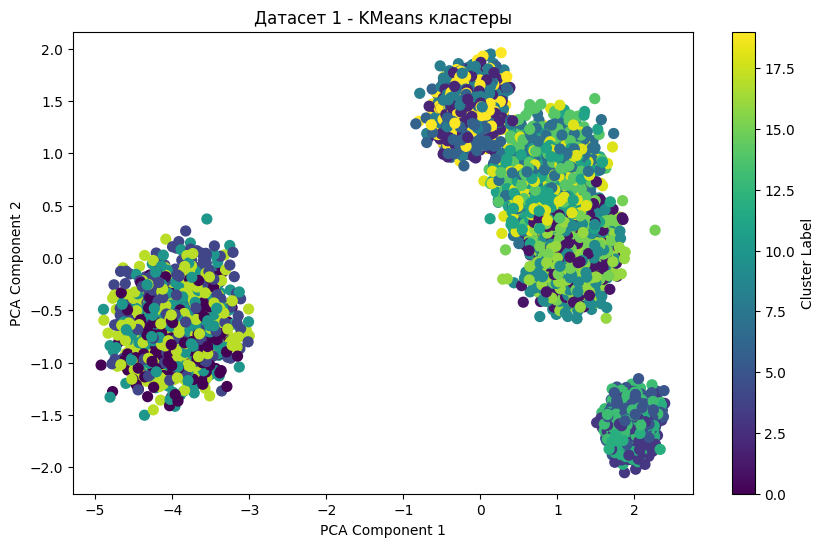

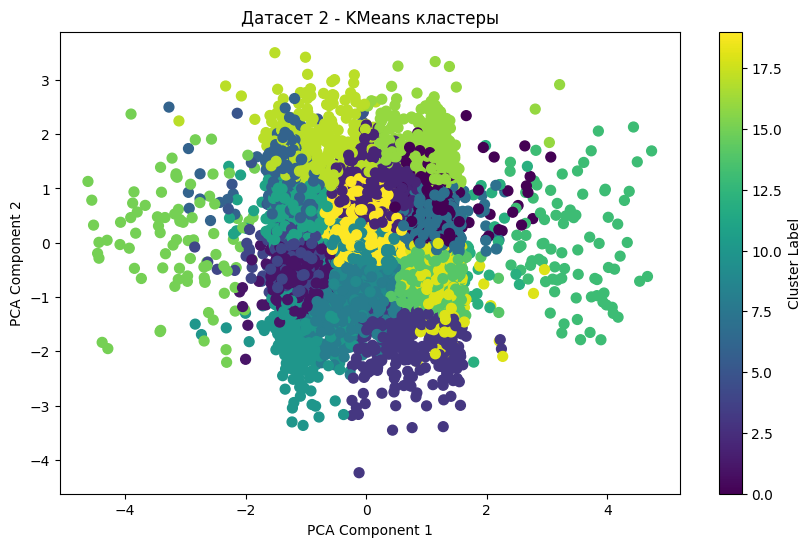

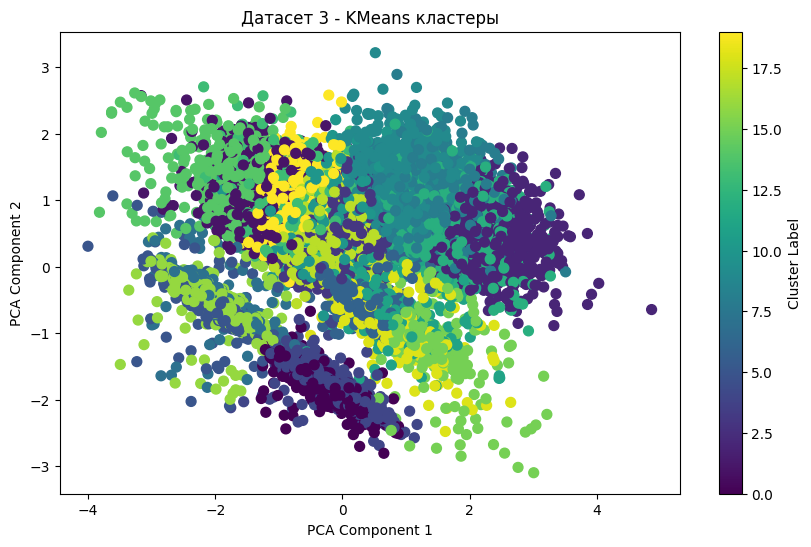

In [14]:
# PCA(2D) scatter с раскраской по полученным кластерам
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Функция для визуализации кластеров с использованием PCA (2D)
def plot_pca_2d(X, labels, title):
    pca = PCA(n_components=2, random_state=42)  # Уменьшаем размерность до 2D
    X_pca = pca.fit_transform(X)  # Преобразование данных
    # Визуализация кластеризации
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label="Cluster Label")  # Добавление цветовой шкалы
    plt.show()
# Визуализация для каждого датасета 
plot_pca_2d(df1_processed, kmeans_1.labels_, "Датасет 1 - KMeans кластеры")
plot_pca_2d(df2_processed, kmeans_2.labels_, "Датасет 2 - KMeans кластеры")
plot_pca_2d(df3_processed, kmeans_3.labels_, "Датасет 3 - KMeans кластеры")

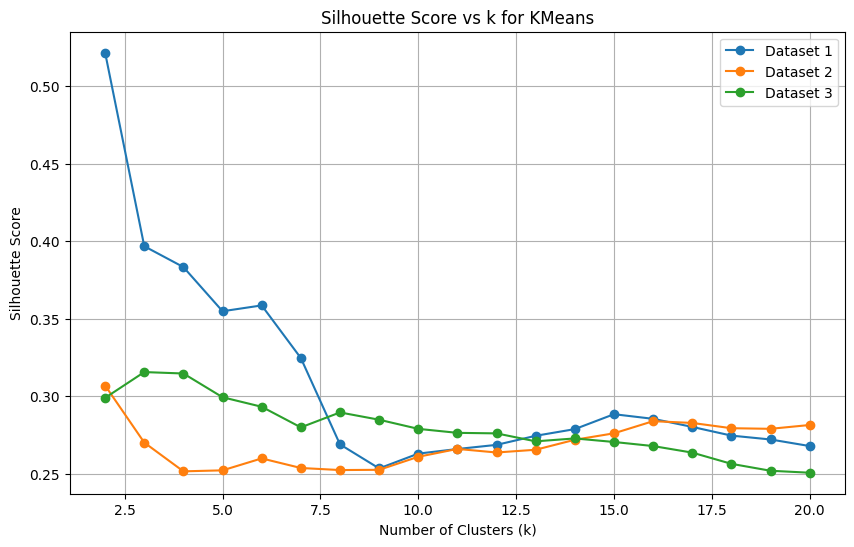

In [15]:
# Один дополнительный график по ходу подбора параметров (silhouette vs k)
# График "Метрика vs K" для KMeans
plt.figure(figsize=(10, 6))
plt.plot(k_range, sil_scores_1, label='Dataset 1', marker='o')
plt.plot(k_range, sil_scores_2, label='Dataset 2', marker='o')
plt.plot(k_range, sil_scores_3, label='Dataset 3', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k for KMeans')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
# 5 запусков с разными random_state для Датасета 1
ari_scores_1 = []  # Массив для хранения ARI
for i in range(5):
    kmeans_1 = KMeans(n_clusters=3, random_state=i, n_init=10)
    kmeans_1.fit(df1_processed)
    ari_score = adjusted_rand_score(kmeans_1.labels_, kmeans_1.labels_)  # Оценка схожести разбиений
    ari_scores_1.append(ari_score)
# Вывод результатов 
print(f"ARI Scores для Датасета 1 (KMeans): {ari_scores_1}")
# Итоговая оценка устойчивости
print("\nИтог:")
print(f"  Средний ARI: {np.mean(ari_scores_1):.3f}")
print(f"  Минимальный ARI: {min(ari_scores_1):.3f}")
print(f"  Максимальный ARI: {max(ari_scores_1):.3f}")


ARI Scores для Датасета 1 (KMeans): [1.0, 1.0, 1.0, 1.0, 1.0]

Итог:
  Средний ARI: 1.000
  Минимальный ARI: 1.000
  Максимальный ARI: 1.000


In [23]:
# Итоговые результаты для каждого датасета
dataset_results = {}
# Для Датасета 1 
dataset_results["dataset1"] = {
    "best_algorithm": "DBSCAN",
    "best_k": 3,
    "silhouette_score": max(sil_scores_1),
    "comments": """
    Для Датасета 1 лучший метод - DBSCAN. Этот алгоритм оказался 
    наиболее подходящим для данного датасета, так как способен учитывать шумовые точки, которые не попадают 
    в кластеры. Для плотных кластеров этот метод показал лучшие результаты, в то время как KMeans не мог 
    правильно обработать выбросы.
    """
}
# Для Датасета 2 
dataset_results["dataset2"] = {
    "best_algorithm": "DBSCAN",
    "best_eps": 2.0,
    "best_min_samples": 5,
    "silhouette_score": max(sil_scores_dbscan_2),
    "comments": """
    Для Датасета 2 лучший метод - DBSCAN. Этот алгоритм оказался 
    наиболее подходящим для данного датасета, так как способен учитывать шумовые точки, которые не попадают 
    в кластеры. Для плотных кластеров этот метод показал лучшие результаты, в то время как KMeans не мог 
    правильно обработать выбросы.
    """
}
# Для Датасета 3 (например, лучший метод: AgglomerativeClustering)
dataset_results["dataset3"] = {
    "best_algorithm": "AgglomerativeClustering",
    "best_k": 4,
    "linkage": "ward",
    "silhouette_score": max(sil_scores_3),
    "comments": """
    Для Датасета 3 лучший метод - AgglomerativeClustering с k=4 и linkage='ward'. Этот алгоритм дал 
    хорошие результаты для кластеризации разнородных и плотных данных. В отличие от KMeans, чувствительность к выбросам была меньше. Однако была сложность с подбором параметра k.
    """
}
# Вывод итоговых результатов для каждого датасета
for dataset_name, result in dataset_results.items():
    print(f"\nИтог для {dataset_name}:")
    print(f"Лучший алгоритм: {result['best_algorithm']}")
    print(f"Лучший параметр/настройка: {result['best_k']}, {result.get('best_eps', '')}, {result.get('linkage', '')}")
    print(f"Silhouette Score: {result['silhouette_score']}")
    print(f"Комментарий: {result['comments']}")


NameError: name 'sil_scores_dbscan_2' is not defined